In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plot_helpers
from ast import literal_eval
from scipy.stats import pearsonr
from config import *


In [2]:
MAIN_DATA_PATH = r"/Users/sam/MovieSummaries"

In [3]:
#List of column names/labels to be used while reading the files into the dataframes since the files do not contain any column labels

movie_metadata_column_names = ['Wikipedia_Movie_ID',
'Freebase_Movie_ID',
'Movie_Name',
'Movie_Release_Date',
'Movie_Box_Office_Revenue',
'Movie_Runtime',
'Movie_Languages',
'Movie_Countries',
'Movie_Genres']

plot_summaries_column_names = ['Wikipedia_Movie_ID',
'Movie_Plot_Summary']

In [4]:
#Specify Converters to convert all dicts rendered as strings in the movie_metadata dataframe into dicts for easier analysis
movie_metadata = pd.read_table(os.path.join(MAIN_DATA_PATH,"movie.metadata.tsv"), header = None, names = movie_metadata_column_names,converters = {'Movie_Languages':literal_eval, 'Movie_Countries':literal_eval, 'Movie_Genres':literal_eval})
display(movie_metadata)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'}
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'}
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ..."


In [5]:
movie_plot_summaries = pd.read_table(os.path.join(MAIN_DATA_PATH,"plot_summaries.txt"),header = None, names = plot_summaries_column_names)
display(movie_plot_summaries)

,Wikipedia_Movie_ID,Movie_Plot_Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [6]:
#Dropping the Freebase Movie ID column since it may not be helpful for any analysis
movie_metadata = movie_metadata.drop(columns = ['Freebase_Movie_ID'])
display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp..."
2,28463795,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D..."
3,9363483,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic..."
4,261236,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'}
...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'}
81737,34980460,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0..."
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}"
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ..."


In [7]:
movie_metadata.dtypes

Wikipedia_Movie_ID            int64
Movie_Name                   object
Movie_Release_Date           object
Movie_Box_Office_Revenue    float64
Movie_Runtime               float64
Movie_Languages              object
Movie_Countries              object
Movie_Genres                 object
dtype: object

In [8]:
movie_plot_summaries.dtypes

Wikipedia_Movie_ID     int64
Movie_Plot_Summary    object
dtype: object

## Remove Duplicate Records

In [9]:
#Check for and remove duplicate movie records
movie_metadata = movie_metadata[~movie_metadata.astype(str).duplicated(subset = ['Movie_Name','Movie_Release_Date','Movie_Box_Office_Revenue','Movie_Runtime','Movie_Languages','Movie_Countries','Movie_Genres'])]

In [10]:
display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp..."
2,28463795,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D..."
3,9363483,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic..."
4,261236,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'}
...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'}
81737,34980460,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0..."
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}"
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ..."


## Check for Missing Values

In [11]:
movie_metadata.isna().sum()

Wikipedia_Movie_ID              0
Movie_Name                      0
Movie_Release_Date           6895
Movie_Box_Office_Revenue    73333
Movie_Runtime               20443
Movie_Languages                 0
Movie_Countries                 0
Movie_Genres                    0
dtype: int64

In [12]:
movie_plot_summaries.isna().sum()

Wikipedia_Movie_ID    0
Movie_Plot_Summary    0
dtype: int64

## Descriptive Statistics

In [13]:
movie_metadata.describe()

,Wikipedia_Movie_ID,Movie_Box_Office_Revenue,Movie_Runtime
count,8.173400e+04,8.401000e+03,6.129100e+04
mean,1.740692e+07,4.799363e+07,1.118192e+02
std,1.098763e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323566e+06,2.083193e+06,8.100000e+01
50%,1.777709e+07,1.063969e+07,9.300000e+01
75%,2.715081e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


(0.0, 250000000.0)

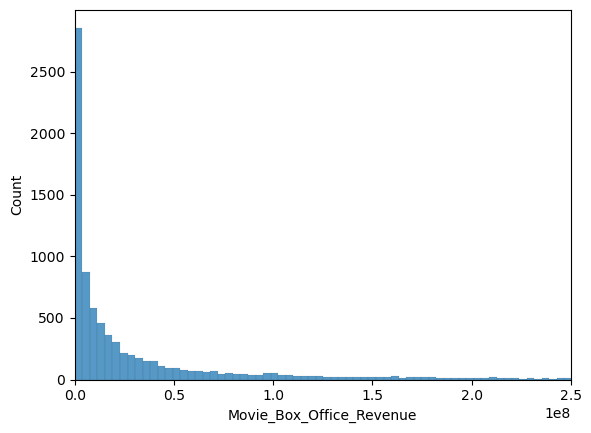

In [14]:
#Distribution of Movie Box Office Revenues
ax1 = sns.histplot(data = movie_metadata, x = "Movie_Box_Office_Revenue")
#For removing outliers
ax1.set_xlim([0,0.25e9])

In [15]:
#Convert dicts to lists of values for easy analysis since IDs (dict keys) are not required

movie_metadata['Movie_Languages'] = movie_metadata['Movie_Languages'].apply(lambda x: list(x.values()))
movie_metadata['Movie_Countries'] = movie_metadata['Movie_Countries'].apply(lambda x: list(x.values()))
movie_metadata['Movie_Genres'] = movie_metadata['Movie_Genres'].apply(lambda x: list(x.values()))

display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]
81737,34980460,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]"
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]"
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


In [16]:
def get_category_wise_counts(category_by_records_net):
    
    count_by_category_net = {}
    
    for record_categories in category_by_records_net:
        for category in record_categories:
            count_by_category_net[category] = count_by_category_net.get(category,0) + 1
            
    return count_by_category_net

In [17]:
count_by_language_net = get_category_wise_counts(list(movie_metadata['Movie_Languages']))
count_by_language_net

{'English Language': 40891,
 'Norwegian Language': 208,
 'German Language': 2258,
 'Silent film': 3183,
 'Spanish Language': 3673,
 'Japanese Language': 2295,
 'Turkish Language': 194,
 'Russian Language': 1024,
 'Italian Language': 2531,
 'Tamil Language': 1896,
 'Hindi Language': 3742,
 'Malayalam Language': 1448,
 'Standard Mandarin': 1213,
 'Afrikaans Language': 41,
 'Cantonese': 876,
 'Standard Cantonese': 481,
 'Swedish Language': 509,
 'Danish Language': 442,
 'Portuguese Language': 398,
 'Dutch Language': 597,
 'Polish Language': 370,
 'Korean Language': 779,
 'Hungary': 2,
 'Hungarian language': 241,
 'Telugu language': 1197,
 'French Language': 3422,
 'Punjabi language': 177,
 'Romani language': 15,
 'Serbo-Croatian': 98,
 'Bulgarian Language': 79,
 'Serbian language': 310,
 'Arabic Language': 499,
 'Greek Language': 187,
 'Nepali Language': 44,
 'Swahili Language': 33,
 'Finnish Language': 172,
 'Tagalog language': 351,
 'Romanian Language': 116,
 'Bengali Language': 457,
 '

In [18]:
count_by_country_net = get_category_wise_counts(list(movie_metadata['Movie_Countries']))
count_by_country_net

{'United States of America': 34408,
 'Norway': 345,
 'United Kingdom': 7867,
 'Germany': 2393,
 'South Africa': 200,
 'Argentina': 1468,
 'Japan': 2647,
 'Turkey': 215,
 'German Democratic Republic': 322,
 'Soviet Union': 564,
 'France': 4395,
 'Italy': 3163,
 'India': 8410,
 'New Zealand': 355,
 'Mexico': 870,
 'Australia': 1114,
 'Hong Kong': 1240,
 'Netherlands': 840,
 'Denmark': 610,
 'Sweden': 657,
 'Canada': 2534,
 'Brazil': 298,
 'Switzerland': 280,
 'Poland': 382,
 'Spain': 1136,
 'South Korea': 887,
 'Hungary': 325,
 'West Germany': 647,
 'Pakistan': 189,
 'Yugoslavia': 306,
 'Algeria': 43,
 'Nepal': 43,
 'Kenya': 17,
 'England': 211,
 'Finland': 247,
 'Ireland': 287,
 'China': 645,
 'Austria': 267,
 'Philippines': 389,
 'Romania': 139,
 'Slovakia': 33,
 'Czech Republic': 240,
 'Portugal': 167,
 'Egypt': 153,
 'Czechoslovakia': 376,
 'Northern Ireland': 5,
 'Israel': 235,
 'Iceland': 80,
 'Indonesia': 124,
 'Belgium': 360,
 'Greece': 192,
 'Iraq': 18,
 'Republic of Macedonia':

In [19]:
count_by_genre_net = get_category_wise_counts(list(movie_metadata['Movie_Genres']))
count_by_genre_net

{'Thriller': 8744,
 'Science Fiction': 3052,
 'Horror': 5280,
 'Adventure': 4963,
 'Supernatural': 641,
 'Action': 8798,
 'Space western': 13,
 'Mystery': 3195,
 'Biographical film': 1198,
 'Drama': 34005,
 'Crime Drama': 563,
 'Crime Fiction': 6948,
 'Erotic thriller': 209,
 'Psychological thriller': 1331,
 'Short Film': 8140,
 'Silent film': 5250,
 'Indie': 6897,
 'Black-and-white': 9094,
 'Comedy': 16348,
 'Family Film': 4598,
 'Fantasy': 2820,
 'World cinema': 7155,
 'Musical': 4160,
 'Japanese Movies': 2322,
 'Action/Adventure': 4561,
 'Romantic comedy': 2680,
 'Ensemble Film': 453,
 'Comedy-drama': 1720,
 'Romantic drama': 3372,
 'Romance Film': 10232,
 'Costume drama': 485,
 'War film': 2652,
 'Epic': 278,
 'Period piece': 1758,
 'Film adaptation': 1531,
 'Animation': 3534,
 "Children's/Family": 926,
 "Children's Fantasy": 280,
 'Future noir': 33,
 'Comedy film': 4361,
 'Coming of age': 910,
 'Suspense': 759,
 'Crime Thriller': 2122,
 'Black comedy': 1025,
 'Bollywood': 1321,
 '

Text(0.5, 1.0, 'Top 10 languages')

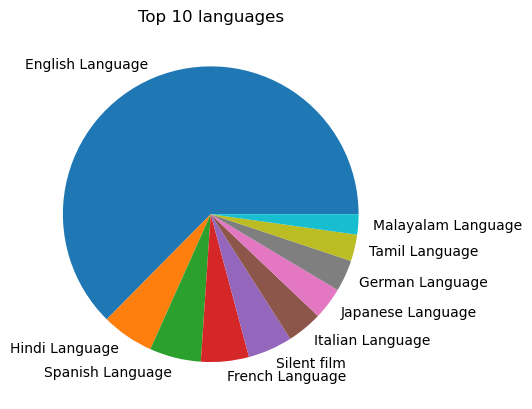

In [20]:
counts = np.array(list(count_by_language_net.values()))
languages = np.array(list(count_by_language_net.keys()))
idx_net_top10_languages_by_count = np.argsort(counts)[::-1][:10]
top10_languages = languages[idx_net_top10_languages_by_count]
counts_top10_languages = counts[idx_net_top10_languages_by_count]
plt.pie(counts_top10_languages, labels = top10_languages)
plt.title("Top 10 languages")

Text(0.5, 1.0, 'Top 10 countries')

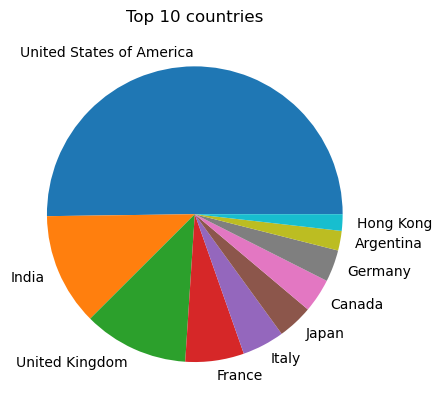

In [21]:
counts = np.array(list(count_by_country_net.values()))
countries = np.array(list(count_by_country_net.keys()))
idx_net_top10_countries_by_count = np.argsort(counts)[::-1][:10]
top10_countries = countries[idx_net_top10_countries_by_count]
counts_top10_countries = counts[idx_net_top10_countries_by_count]
plt.pie(counts_top10_countries, labels = top10_countries)
plt.title("Top 10 countries")

Text(0.5, 1.0, 'Top 10 genres')

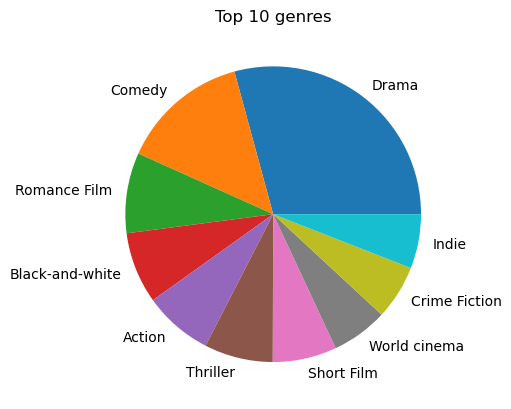

In [22]:
counts = np.array(list(count_by_genre_net.values()))
genres = np.array(list(count_by_genre_net.keys()))
idx_net_top10_genres_by_count = np.argsort(counts)[::-1][:10]
top10_genres = genres[idx_net_top10_genres_by_count]
counts_top10_genres = counts[idx_net_top10_genres_by_count]
plt.pie(counts_top10_genres, labels = top10_genres)
plt.title("Top 10 genres")

In [23]:
#Convert Release Dates to the DateTime format for easier analysis
movie_metadata = movie_metadata.assign(Movie_Release_Date = pd.to_datetime(movie_metadata['Movie_Release_Date'], format = 'mixed', errors = 'coerce'))
movie_metadata.dtypes

Wikipedia_Movie_ID                   int64
Movie_Name                          object
Movie_Release_Date          datetime64[ns]
Movie_Box_Office_Revenue           float64
Movie_Runtime                      float64
Movie_Languages                     object
Movie_Countries                     object
Movie_Genres                        object
dtype: object

In [24]:
#Determine Release Year from the Release Date
movie_metadata = movie_metadata.assign(Movie_Release_Year = movie_metadata['Movie_Release_Date'].dt.year)
movie_metadata.dtypes

Wikipedia_Movie_ID                   int64
Movie_Name                          object
Movie_Release_Date          datetime64[ns]
Movie_Box_Office_Revenue           float64
Movie_Runtime                      float64
Movie_Languages                     object
Movie_Countries                     object
Movie_Genres                        object
Movie_Release_Year                 float64
dtype: object

In [25]:
display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,Movie_Release_Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0
2,28463795,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988.0
3,9363483,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0
4,261236,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],1983.0
...,...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011.0
81737,34980460,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",1972.0
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992.0


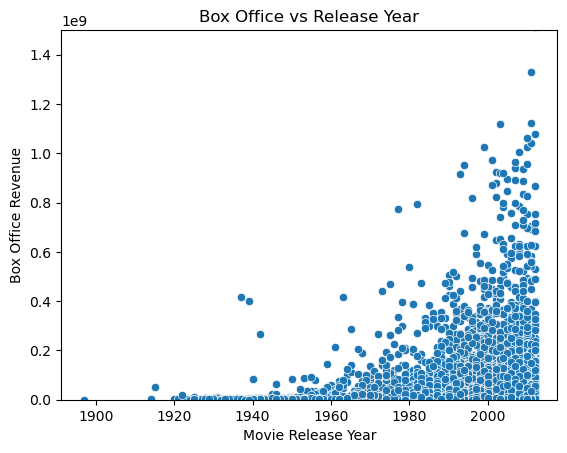

In [26]:
movies_with_box_office_revenue = movie_metadata[~movie_metadata['Movie_Box_Office_Revenue'].isna()]
movies_with_box_office_revenue = movies_with_box_office_revenue[movies_with_box_office_revenue['Movie_Release_Date'] == movies_with_box_office_revenue['Movie_Release_Date']]
plot_helpers.scatter(x="Movie_Release_Year",y="Movie_Box_Office_Revenue", data=movies_with_box_office_revenue,
                     ylim=[0, 1.5e9],xlabel="Movie Release Year", ylabel= "Box Office Revenue", title = "Box Office vs Release Year")

It seems that Movie_Release_Year and Movie_Box_Office_Revenue are correlated!

In [27]:
#Compute correlation coeff 
pearsonr(movies_with_box_office_revenue['Movie_Release_Year'],movies_with_box_office_revenue['Movie_Box_Office_Revenue'])

PearsonRResult(statistic=0.18552664538795255, pvalue=2.253003816364253e-65)

In [28]:
# Fetch historical CPI data
cpi_url = 'https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/'
cpi_data = pd.read_html(cpi_url)[0]
cpi_data.columns = cpi_data.iloc[1]
cpi_data = cpi_data[2:-1] # data from 1913 to 2022
yearly_cpi_avg = cpi_data.groupby('Year')['Avg'].mean().reset_index()

yearly_cpi_avg['Year'] = yearly_cpi_avg['Year'].astype(float)
yearly_cpi_avg['Avg'] = yearly_cpi_avg['Avg'].astype(float)
yearly_cpi_avg = yearly_cpi_avg.rename(columns={"Year": "Year_cpi", "Avg": "Avg_cpi"})

Box_Office_Revenue_with_cpi = pd.merge(movies_with_box_office_revenue, yearly_cpi_avg, left_on='Movie_Release_Year', right_on='Year_cpi', how = 'left')
Box_Office_Revenue_with_cpi.drop('Year_cpi', axis=1, inplace=True)

base_year = 2022.0 # lastest value in CPI dataset

Box_Office_Revenue_with_cpi['Adjusted_Revenue'] = Box_Office_Revenue_with_cpi.apply(
    lambda row: row['Movie_Box_Office_Revenue'] / row['Avg_cpi'] * 
    yearly_cpi_avg[yearly_cpi_avg['Year_cpi'] == base_year]['Avg_cpi'].values[0],
    axis=1
)

display(Box_Office_Revenue_with_cpi)


,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,Movie_Release_Year,Avg_cpi,Adjusted_Revenue
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,177.100,2.315268e+07
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",1938.0,14.100,7.472043e+07
2,171005,Henry V,1989-11-08,10161099.0,137.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",1989.0,124.000,2.398142e+07
3,77856,Mary Poppins,1964-08-27,102272727.0,139.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",1964.0,31.000,9.655040e+08
4,612710,New Rose Hotel,1999-10-01,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie...",1999.0,166.600,3.780449e+04
...,...,...,...,...,...,...,...,...,...,...,...
8322,54540,Coming to America,1988-06-29,288752301.0,117.0,[English Language],[United States of America],"[Romantic comedy, Comedy of manners, Drama, Co...",1988.0,118.300,7.143263e+08
8323,7761830,Spaced Invaders,1990-01-01,15369573.0,100.0,[English Language],[United States of America],"[Alien Film, Science Fiction, Family Film, Com...",1990.0,130.700,3.441456e+07
8324,1918494,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]",2000.0,172.200,1.180217e+07
8325,664006,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri...",1993.0,144.500,4.635133e+07


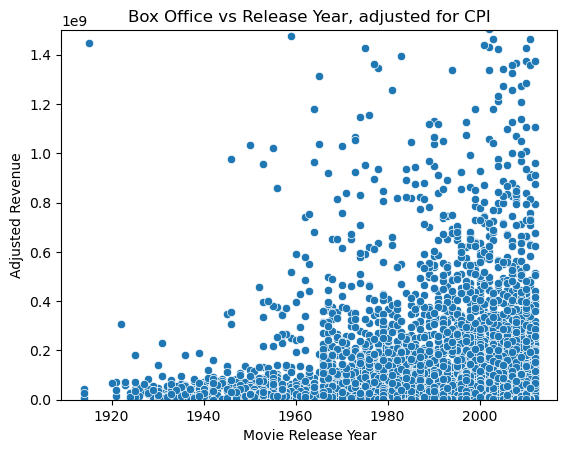

In [29]:
Box_Office_Revenue_with_cpi = Box_Office_Revenue_with_cpi[~Box_Office_Revenue_with_cpi['Adjusted_Revenue'].isna()]
Box_Office_Revenue_with_cpi = Box_Office_Revenue_with_cpi[Box_Office_Revenue_with_cpi['Movie_Release_Date'] == Box_Office_Revenue_with_cpi['Movie_Release_Date']]

plot_helpers.scatter(x="Movie_Release_Year",y="Adjusted_Revenue", data=Box_Office_Revenue_with_cpi,
                     xlabel="Movie Release Year", ylabel= "Adjusted Revenue",
                     title = "Box Office vs Release Year, adjusted for CPI", remove_outliers=True, threshold = 6)

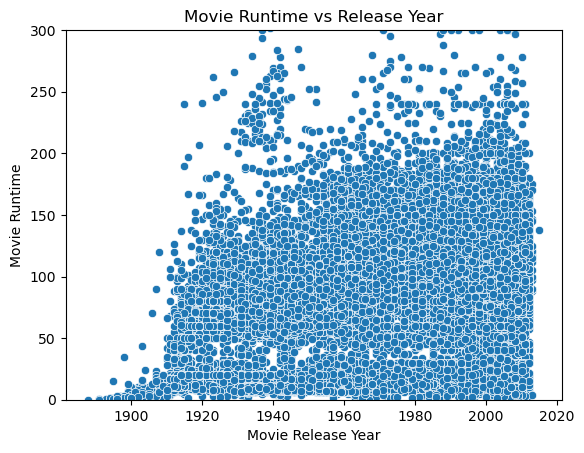

In [49]:
movies_with_runtime = movie_metadata[~movie_metadata['Movie_Runtime'].isna()]
movies_with_runtime = movies_with_runtime[movies_with_runtime['Movie_Release_Date'] == movies_with_runtime['Movie_Release_Date']]

# one movie ("Zero Tolerance) had a non-existant length, so we drop it:
movies_with_runtime = movies_with_runtime.drop(movies_with_runtime[movies_with_runtime['Movie_Runtime'] > 10000].index)


plot_helpers.scatter(x="Movie_Release_Year",y="Movie_Runtime", data=movies_with_runtime,
                     xlabel="Movie Release Year", ylabel= "Movie Runtime", title = "Movie Runtime vs Release Year",
                     remove_outliers=True,threshold=3)

It seems that Movie_Release_Year and Movie_Runtime are NOT correlated!

In [77]:
# We verify this by removing outliers from Movie_Release_Year (it must lie between 0 and 300 only). To not bias the correlation coefficient, 
# we also remove movies before 1920 for the analysis, as these movies were significantly shorter.

#Compute correlation coeff 
pearsonr_movie_runtime = movies_with_runtime[movies_with_runtime.Movie_Runtime<300]
pearsonr_movie_runtime = pearsonr_movie_runtime[pearsonr_movie_runtime.Movie_Release_Year>1920]

pearsonr(pearsonr_movie_runtime['Movie_Release_Year'],pearsonr_movie_runtime['Movie_Runtime'])


PearsonRResult(statistic=0.21117297194786522, pvalue=0.0)

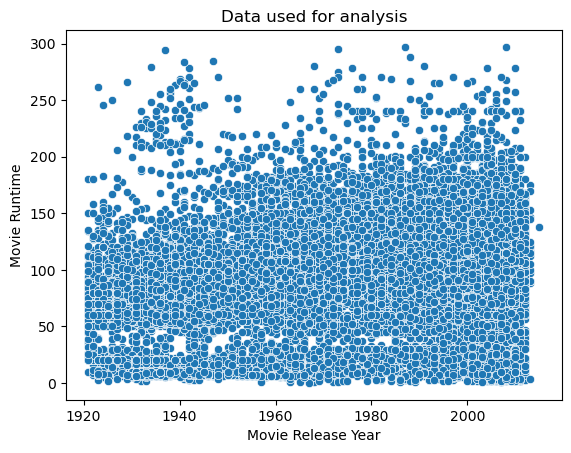

In [78]:
plot_helpers.scatter(x="Movie_Release_Year",y="Movie_Runtime", data=pearsonr_movie_runtime,
                     xlabel="Movie Release Year", ylabel= "Movie Runtime", title = "Data used for analysis")